Session 19 | Data Science for Oil & Gas @ PGU

# Project Title :- 



##### $\color{red}{\text{ Machine Learning to Train a Temperature Predictor that can Predict Bottomhole Temperature using \n Production parameters as inputs.}}$

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Import the Dataset

>The Dataset we will use is the Volve-Field Dataset, which is a Time-Series Dataset
>>In Time Series Dataset, always use these two steps during import : **index_col=0, parse_dates=True**

In [3]:
df = pd.read_csv("Volve P-12_DatesCorrected.csv")

In [4]:
df

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3286,2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3287,2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3288,2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
3289,2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


In [5]:
df = pd.read_csv('Volve P-12_DatesCorrected.csv',
                 index_col=0, parse_dates=True)

In [6]:
df

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.000,0.00000,0.0,0.0,0.000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


#### Majority of Data Science is Exploring, Processing and Analyzing the Data.
>Once the data is ready to be used, then only at the end Machine-Learning is carried out.

#### Look at the Head and the Tail of the Dataset

In [7]:
df.head(5)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df.tail(5)

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
2016-01-08,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-09,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-10,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-11,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0
2016-01-12,0.0,0,0.0,0.0,0.0,0.0,19.959,0.90339,0.0,0.0,0.026,0.0,0.0,0.0


#### Check the Data-Info, in order to see for Datatypes and Null counts. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3291 entries, 2007-01-09 to 2016-01-12
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onstreaminject_HRS              3291 non-null   float64
 1   BORE_WI_VOL                     3291 non-null   int64  
 2   ON_STREAM_HRS                   3291 non-null   float64
 3   AVG_DOWNHOLE_PRESSURE           3291 non-null   float64
 4   AVG_DOWNHOLE_TEMPERATURE        3291 non-null   float64
 5   AVG_DP_TUBING                   3291 non-null   float64
 6   AVG_ANNULUS_PRESS               3291 non-null   float64
 7   AVG_CHOKE_SIZE_P in percentage  3291 non-null   float64
 8   AVG_WHP_P                       3291 non-null   float64
 9   AVG_WHT_P                       3291 non-null   float64
 10  DP_CHOKE_SIZE                   3291 non-null   float64
 11  BORE_OIL_VOL                    3291 non-null   float64
 12  BORE_GAS_VOL    

##### Note : The good thing with Dataset is :- We have :-
1. All Non-Nulls (No column has null values). All Non-Null Entries = Row Count. 
2. All Numeric Data (which is a good thing)

#### Descriptive Statistics 
> Watch out for how far Min-Max are from the IQR

In [10]:
df.describe()

,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
count,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000,3291.000000
mean,19.528256,4935.663628,20.017419,76.283155,31.424488,80.758924,16.368846,64.158081,45.803679,74.345872,18.657338,1402.086752,204365.771346,2105.660438
std,8.669803,2625.955533,8.303784,118.248271,48.547561,73.006429,7.197959,33.810811,25.954204,26.140866,22.896388,1642.492700,232710.410394,1952.495950
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-458.000000
25%,21.670000,3972.500000,24.000000,0.000000,0.000000,32.235500,12.543000,40.983840,32.199000,76.549000,3.663500,211.000000,33259.000000,40.500000
50%,24.000000,5335.000000,24.000000,0.000000,0.000000,37.921250,18.019000,65.988040,37.464000,81.693000,6.819000,664.000000,101142.000000,1260.000000
75%,24.000000,6851.500000,24.000000,235.838500,105.919000,170.045500,20.587000,99.895675,59.079500,90.002500,26.760500,2026.000000,295593.000000,4109.000000
max,25.000000,9316.000000,25.000000,317.701000,107.508000,314.409000,30.020000,100.000000,137.311000,92.459000,124.123000,5902.000000,851132.000000,8020.000000


### Lets analyze the outliers from the above table first and then from the Visualization.

##### Question for the Audience :-

>Look at the above table and tell names of columns that are probably having outliers.

#### Answer :-

DP_CHOKE_SIZE | 	BORE_OIL_VOL | 	BORE_GAS_VOL |	BORE_WAT_VOL

Reason being :- How far the Max is from 75% Percentile.

#### Excercise :- Lets Visualize the Boxplots for each of these. (Use Subplots)

In [11]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

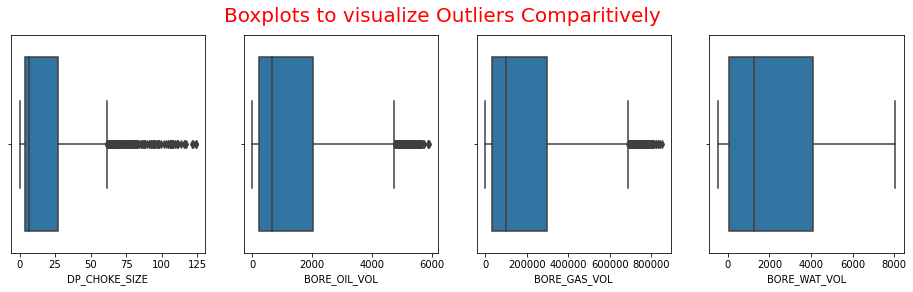

In [12]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.boxplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.boxplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.boxplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.boxplot(df['BORE_WAT_VOL']);

plt.suptitle('Boxplots to visualize Outliers Comparitively', size=20, color='red');

### So you can see our guess was almost correct. 

> We can visualize the same thing using a displot and then we can connect various obserevations in a Boxplot to that in a distribution.

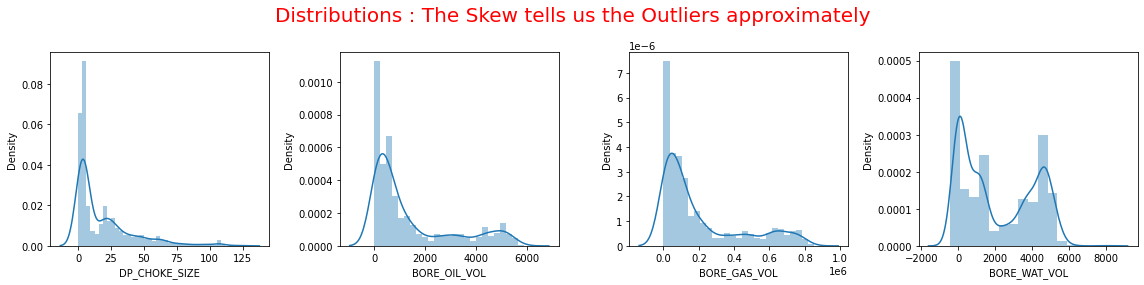

In [13]:
plt.figure(figsize=(16, 4))

plt.subplot(141)
sns.distplot(df['DP_CHOKE_SIZE']);

plt.subplot(142)
sns.distplot(df['BORE_OIL_VOL']);

plt.subplot(143)
sns.distplot(df['BORE_GAS_VOL']);

plt.subplot(144)
sns.distplot(df['BORE_WAT_VOL']);



plt.suptitle('Distributions : The Skew tells us the Outliers approximately', size=20, color='red');

plt.tight_layout()

#### To remove Outliers :- We should either remove all the rows that have outlier data or replace them with values from within the IQR

>> Lets skip that for now

## Important Excercise :- 
Create a function that takes in a column, calculates and returns number of outlers (or % Outliers)

In [14]:
def outlier_counter(col_name, df):
    """
    The rule is :- Any value beyond 75 + 1.5*IQR or 25 - 1.5*IQR is outlier. 
    """
    A = df[col_name]
    
    q_75 = np.quantile(df[col_name], 0.75)
    q_25 = np.quantile(df[col_name], 0.25)
    
    iqr = q_75 - q_25
    
    max_allowed = q_75 + 1.5*iqr
    min_allowed = q_25 - 1.5*iqr
    
    df_temp = A[(A>max_allowed) | (A<min_allowed)]
    count_of_outliers = len(df_temp)
    
    return count_of_outliers , 100*count_of_outliers/len(A)

In [15]:
outlier_counter('DP_CHOKE_SIZE', df)

#205 is Count and 6.23% is % of outliers in that column

(205, 6.229109693102401)

#### Now Lets count outliers for each column & Store it in a dictionary with column name as key

In [16]:
OC = dict()

for c in df.columns:
    
    n,f = outlier_counter(c,df)
    
    OC[c] = [f]

<AxesSubplot:>

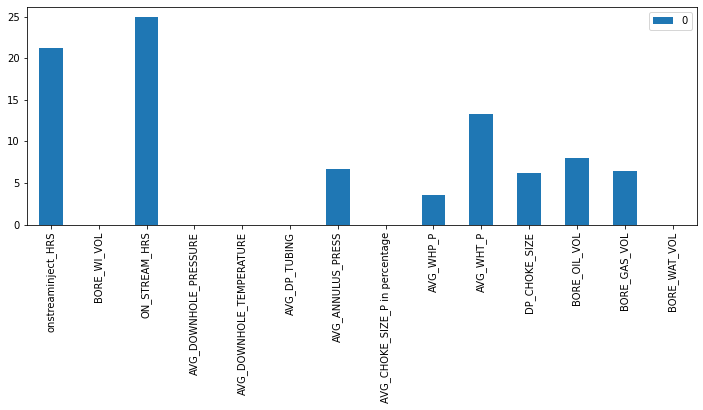

In [17]:
pd.DataFrame(OC).T.plot(kind='bar', figsize=(12, 4))

#### So, Worst columns are :- onstreaminjection_HRS, ON_STREAM_HRS, AVG_WHT_P, Choke size and Bore Oil Vol

#### Excercise :- Visualize the Distribution for each column and see if you can still correlate the above info by looking at the SKEW in the distributions.

## Nulls arent the only hazard to your model. Unnecessary zeros need be checked as well.

### Excercise :- Write a function to count the number of zeros in every column of your data.

In [18]:
def zeros_counter(col_name, df):
    
    A = df[col_name]
    
    n = sum(A == 0)
    
    f = 100*n/len(A)
    
    return n,f

In [19]:
zeros_counter('DP_CHOKE_SIZE', df)

(154, 4.679428745062291)

**Similarly count number of Zeros & store in a DICT and viz**

In [20]:
ZC = dict()

for c in df.columns:
    
    n,f = zeros_counter(c,df)
    
    ZC[c] = [f]

<AxesSubplot:>

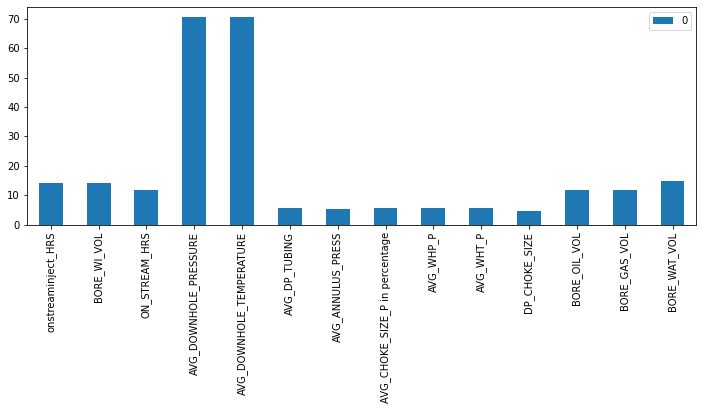

In [21]:
(pd.DataFrame(ZC).T).plot(kind='bar', figsize=(12,4))

#### What if you wanted to show a Threshold of 10% zeros as guided by your manager.

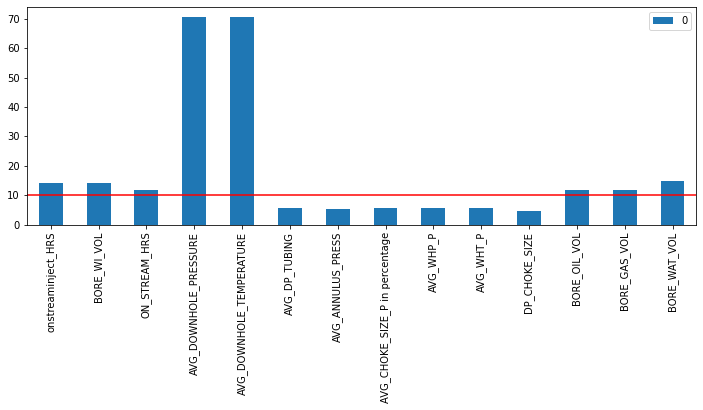

In [22]:
(pd.DataFrame(ZC).T).plot(kind='bar', figsize=(12,4))
plt.axhline(10, color='red')

### Looks like The Downhole Temp and Pressure features have almost 70% zeros. Visualize them. 

>IT almost feels like they don't have any necessary information.

In [23]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [24]:
df_tooManyZeros = df[['AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE']]

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

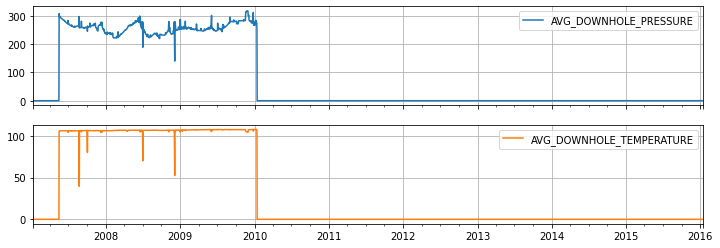

In [25]:
df_tooManyZeros.plot(figsize=(12,4), subplots=True, grid=True)

### This analysis tells us that maybe either the Temperature or the Pressure Sensor Failed around that 2010 mark or maybe both were installed in a common casing which disfunctioned or something wrong.

>Ideally, in a Data-Science Team, we would have field based SME connects who we would ask this question to. 

### Solution to this problem?

>Think! What's your opinion my dear audience?

#### Best Solution :- Get the field personnel to give you the data from an approximate/replacement/nearby sensor data from 2010 onwards. 

#### Temporary Solution :- Interpolation

> We can interpolate with mean for 2010 onwards. 

<AxesSubplot:>

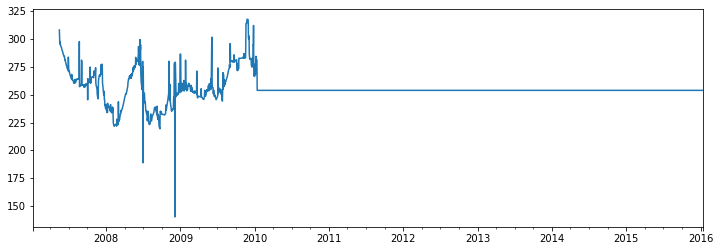

In [26]:
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate().plot(figsize=(12,4))

<AxesSubplot:>

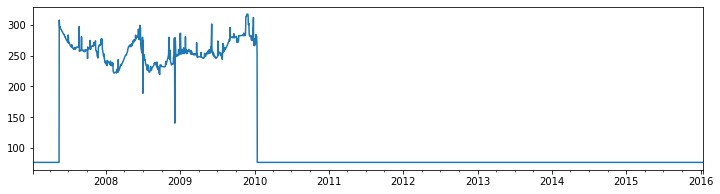

In [27]:
avg_temp = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].mean()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,avg_temp).plot(figsize=(12,3))

#### The choice is yourss, whicherver best works for your team and as per your client agreements. 

> I'm going with Interpolation

In [28]:
df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE'].replace(0,np.nan).interpolate()
df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE'].replace(0,np.nan).interpolate()

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

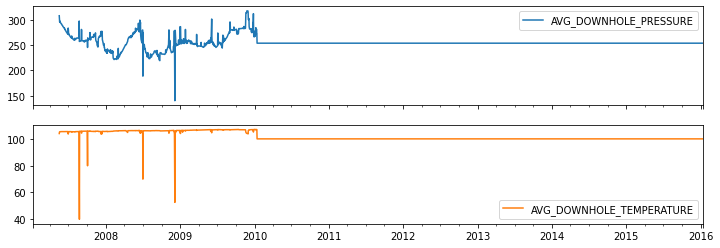

In [29]:
df_tooManyZeros.plot(figsize=(12,4), subplots=True)

### Let's apply this correction to the original Dataset.

In [30]:
df['AVG_DOWNHOLE_PRESSURE'] = df_tooManyZeros['AVG_DOWNHOLE_PRESSURE']
df['AVG_DOWNHOLE_TEMPERATURE'] = df_tooManyZeros['AVG_DOWNHOLE_TEMPERATURE']

#### Verify weather the problem is now solved

In [31]:
ZC_f = dict()

for c in df.columns:
    
    n,f = zeros_counter(c,df)
    
    ZC_f[c] = [f]

(0.0, 100.0)

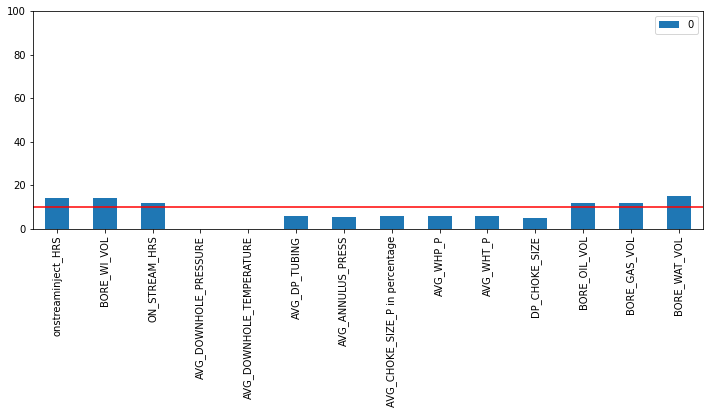

In [32]:
pd.DataFrame(ZC_f).T.plot(kind='bar', figsize=(12,4))

plt.axhline(10, color='red')
plt.ylim(0,100)

### Final and One of the Most Important Preprocessing step :- Scaling of Data

##### 1. But first do the train test split since we dont wanna leak any data to test set.

In [33]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

In [34]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [35]:
output_target = 'AVG_DOWNHOLE_TEMPERATURE'

In [36]:
df_train = df.iloc[:3000,:].fillna(0)
df_test = df.iloc[3000:,:].fillna(0)

In [37]:
X_train = df_train.drop(output_target, axis=1) ; y_train = df_train[output_target]
X_test = df_test.drop(output_target , axis=1) ; y_test = df_test[output_target]

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler = MinMaxScaler()

In [40]:
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [41]:
X_train_scaled.min(), X_train_scaled.max()

(0.0, 1.0)

In [42]:
X_train.values.min(), X_train.values.max()

(-458.0, 8020.0)

## With this nice amount of preprocessing, let's use this processed data for machine-learning. 

# Machine Learning :- The Cherry on the nicely prepped CAKE!

In [43]:
from sklearn.ensemble import RandomForestRegressor

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [44]:
model = RandomForestRegressor(n_estimators=200)

In [45]:
model.fit(X_train_scaled, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [46]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\ensemble\base.py:158: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for ad

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

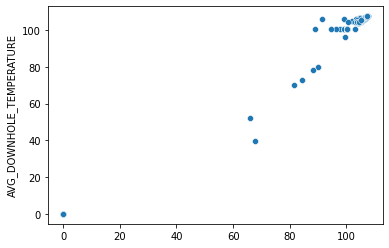

In [47]:
sns.scatterplot(yp_train, y_train)

<AxesSubplot:ylabel='AVG_DOWNHOLE_TEMPERATURE'>

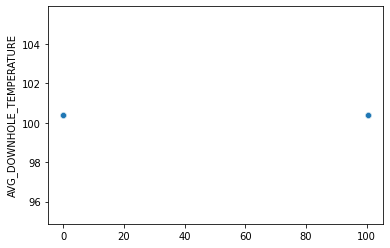

In [48]:
sns.scatterplot(yp_test, y_test)

(13672.0, 16812.0)

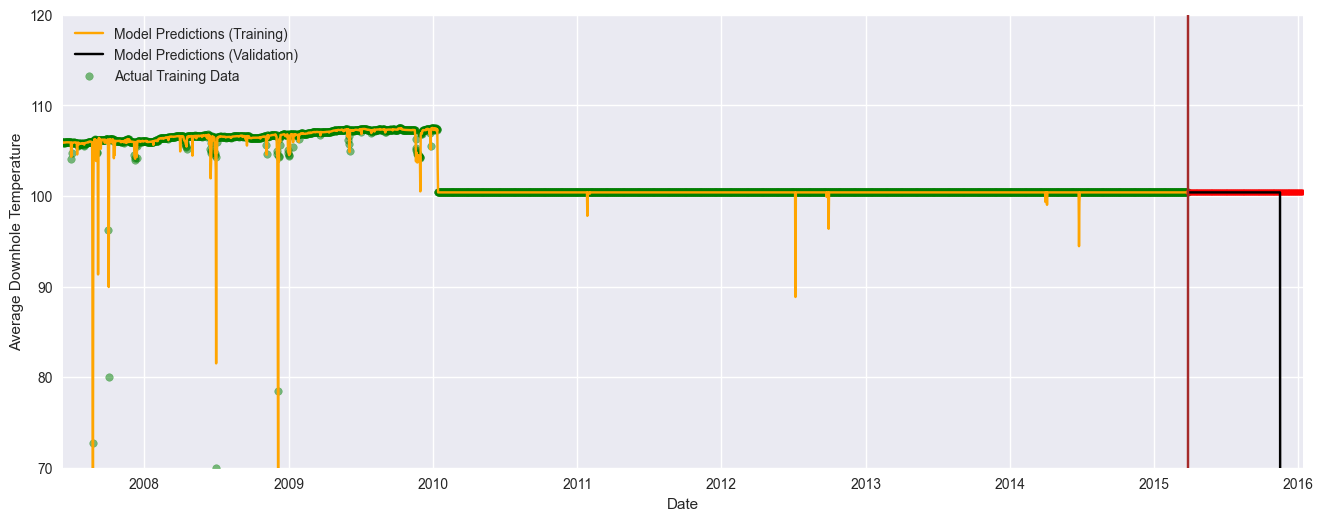

In [49]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='green', alpha=0.5, s=30, label='Actual Training Data')
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)', color='orange')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')


plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])

In [50]:
df

,BORE_WAT_VOL,DP_CHOKE_SIZE,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,BORE_OIL_VOL,AVG_DOWNHOLE_TEMPERATURE
2007-01-09,0.0,0.000,0.0,0.0,0.0,0.0,NaN
2007-01-10,0.0,0.000,0.0,0.0,0.0,0.0,NaN
2007-01-11,0.0,0.000,0.0,0.0,0.0,0.0,NaN
2007-01-12,0.0,0.000,0.0,0.0,0.0,0.0,NaN
2007-01-13,0.0,0.000,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...
2016-01-08,0.0,0.026,0.0,0.0,0.0,0.0,100.389
2016-01-09,0.0,0.026,0.0,0.0,0.0,0.0,100.389
2016-01-10,0.0,0.026,0.0,0.0,0.0,0.0,100.389
2016-01-11,0.0,0.026,0.0,0.0,0.0,0.0,100.389


array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>], dtype=object)

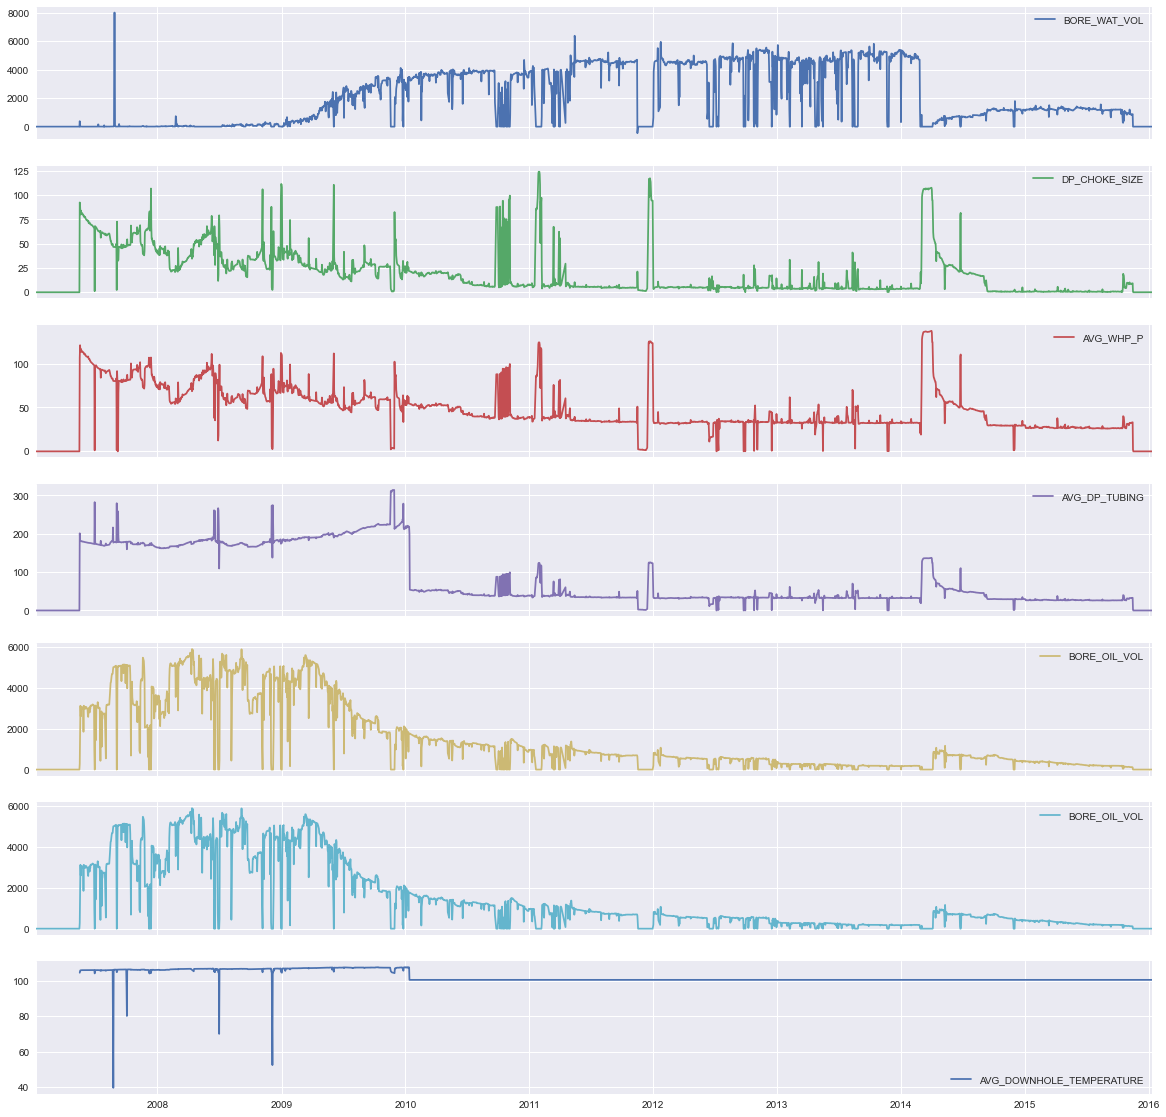

In [53]:
df.plot(subplots=True,figsize=(20,20))

# Take data till 2010, train the ,odel for prediicting AVG DOwnhole Temperature, run prediction on the data after 2010, upload the csv in your github, and share the link